# Introduction to Keras and TensorFlow

## What's TensorFlow?

- Python-based, free, open source machine learning platform.
- Developed primarily by Google..

- It can automatically compute the gradient of any differentiable expression, making it highly suitable for machine learning.
- It can run not only on CPUs, but also on GPUs and TPUs, highly parallel hardware accelerators.
- Computation defined in TensorFlow can be easily distributed across many machines.
- TensorFlow programs can be exported to other runtimes (easy to deploy in practical settings), such as;
    - C++;
    - JavaScript (for browser-based applications), or;
    - TensorFlow Lite (for applications running on mobile devices or embedded devices), etc.

TensorFlow is a platform, home to a vast ecosystem of components.
- TF-Agents for reinforcement-learning research.
- TFX for industry-strength machine learning workflow management.
- TensorFlow Serving for production deployment.
- TensorFlowHub repository of pretrained models.

## What's Keras?

<img src="img/fig-3-1.png" width="600" align="center">

- Google.
- Netflix.
- Uber.
- CERN.
- NASA.
- Yelp.
- Instacart.
- Square.
- Startups...

## Keras and TensorFlow: A brief history

- Theano (2007).
    - Tensor-manipulation library.
    - Automatic differentiation.
    - Static computation graphs for automatic differentiation.
    - Compiling code to both CPU and GPU.
    - GPU support -- the earliest of its kind.
    - Developed at the Montréal Institute for Learning Algorithms (MILA).
    - Precursor of TensorFlow.
- TensorFlow (Nov 2015).
- Keras (March 2015).
    - Built initially on top of Theano.

- In 2015, Keras was refactored to a multibackend architecture: Keras or TensorFlow,

- In 2017:
    - CNTK (developed by Microsoft), and;
    - MXNet (developed by Amazon).
- Today, both Theano and CNTK are out of development.
- MXNet is not widely used outside of Amazon.
- Throughout 2016 and 2017, Keras became well known as the user-friendly way to develop TensorFlow applications.
- Late 2017, a majority of TensorFlow users were using it through Keras or in combination with Keras.
- In 2018, the TensorFlow leadership picked Keras as TensorFlow’s official high-level API.
- TensorFlow 2.0, (Sept. 2019_ -- an extensive redesign of TensorFlow and Keras.

## Setting up a deep-learning workspace

- Reference tutorials.

1. Low-level tensor manipulation:
- Tensors, store the network’s state (variables).
- Tensor operations such as ```addition```, ```relu```, ```matmul```.
- Backpropagation.
2. High-level deep learning concepts:
- Layers.
- A loss function (feedback signal used for learning).
- An optimizer (how learning proceeds).
- Metrics (evaluates model performance, such as accuracy).
- A training loop (performs mini-batch stochastic gradient descent).

## First steps with TensorFlow

### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-2.0883086]
 [-0.3288828]
 [-1.4319193]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.60391665]
 [0.25971007]
 [0.2132858 ]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.44799462],
       [-0.2792015 ],
       [ 0.66028273]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

### A second look at the GradientTape API

**Using the `GradientTape`**

$f(x) = x^2$

$\dfrac{\partial f}{\partial x} = 2x$

$\left[\dfrac{\partial f}{\partial x}\right]_{x=3} = 2 \cdot x = 2\cdot 3 = 6$


In [13]:
x = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   f = tf.square(x)
gradient = tape.gradient(f, x)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order gradients**

In [15]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [16]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [17]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [18]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

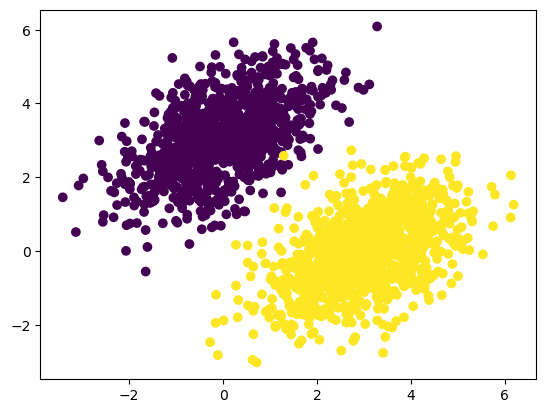

In [19]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [20]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [21]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [22]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [23]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [24]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.5623
Loss at step 1: 0.7432
Loss at step 2: 0.2305
Loss at step 3: 0.1532
Loss at step 4: 0.1339
Loss at step 5: 0.1232
Loss at step 6: 0.1143
Loss at step 7: 0.1062
Loss at step 8: 0.0990
Loss at step 9: 0.0923
Loss at step 10: 0.0863
Loss at step 11: 0.0808
Loss at step 12: 0.0758
Loss at step 13: 0.0713
Loss at step 14: 0.0671
Loss at step 15: 0.0634
Loss at step 16: 0.0599
Loss at step 17: 0.0568
Loss at step 18: 0.0540
Loss at step 19: 0.0514
Loss at step 20: 0.0490
Loss at step 21: 0.0468
Loss at step 22: 0.0449
Loss at step 23: 0.0431
Loss at step 24: 0.0415
Loss at step 25: 0.0400
Loss at step 26: 0.0387
Loss at step 27: 0.0374
Loss at step 28: 0.0363
Loss at step 29: 0.0353
Loss at step 30: 0.0344
Loss at step 31: 0.0335
Loss at step 32: 0.0328
Loss at step 33: 0.0321
Loss at step 34: 0.0315
Loss at step 35: 0.0309
Loss at step 36: 0.0303
Loss at step 37: 0.0299
Loss at step 38: 0.0294
Loss at step 39: 0.0290


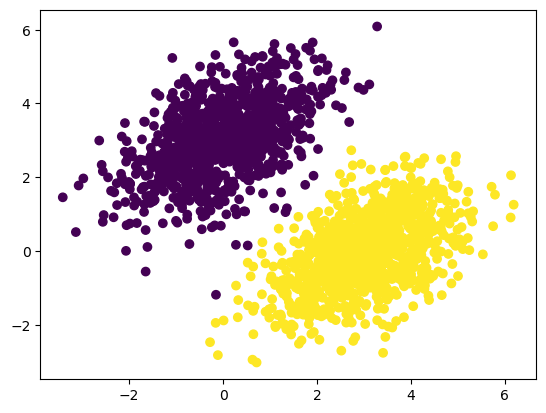

In [25]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

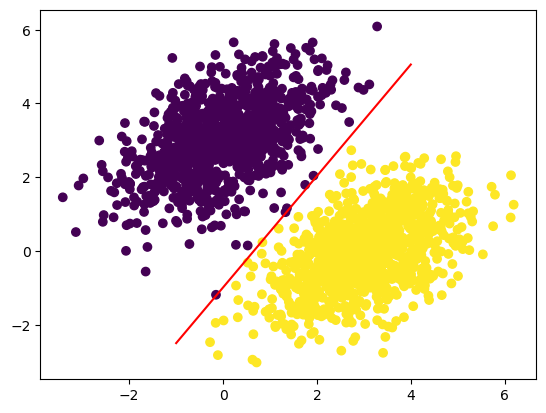

In [26]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [ ]:
history.history

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

## Summary